#Importing relevant Libraries

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Loading Dataset

In [0]:
PATH = '/content/drive/My Drive/Colab Notebooks/Capstone Project/'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
plantDf = pd.read_csv(PATH+'Data/capstone_train_imputed.csv')
plantDfOriginal = plantDf.copy()

In [0]:
plantDf.shape

(464809, 14)

#Analysing Data

In [0]:
plantDf.sample(10)

,Unnamed: 0,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Cat_Plant_Type
306131,306131,2974,130,16,350,52,3671,244,229.0,109,1546,30,1,1
410184,410184,2917,47,11,30,2,4430,224,217.0,125,3051,29,1,1
97788,97788,3260,337,15,127,14,553,186,221.0,171,1120,32,2,0
356208,356208,2596,205,24,90,-7,1724,198,253.0,179,1484,2,3,1
221609,221609,3005,200,15,108,29,1594,214,252.0,169,446,31,3,1
160238,160238,3403,135,4,534,114,1271,226,238.0,147,2839,32,3,0
179349,179349,3154,343,21,212,80,1060,174,204.0,166,2048,29,1,0
384566,384566,3138,74,12,331,57,1397,234,219.0,114,3309,33,3,0
348458,348458,2976,125,24,277,50,1689,252,214.0,76,1321,13,3,1
68289,68289,2716,63,22,228,19,1090,233,188.0,76,1741,31,3,1


In [0]:
plantDf.drop('Unnamed: 0', axis = 1, inplace = True)

#Treating Skewness and Outliers

In [0]:
skew = plantDf.skew().abs()
skew.sort_values(ascending = False)

Cat_Plant_Type                       2.276330
Standing_Distance_To_Water_Source    1.793613
Distance_To_Fire                     1.288951
Shadow_In_Morning                    1.181143
Distance_To_Water_Source             1.140487
Shadow_In_Midday                     1.128504
Heigh_From_Sea_Level                 0.817019
Slope                                0.789069
Distance_To_Road                     0.711927
Turf                                 0.704944
Aspect                               0.403099
Shadow_In_Evening                    0.274835
Neighbourhood_Type                   0.091092
dtype: float64

In [0]:
cols = plantDf.columns
cols

Index(['Heigh_From_Sea_Level', 'Aspect', 'Slope', 'Distance_To_Water_Source',
       'Standing_Distance_To_Water_Source', 'Distance_To_Road',
       'Shadow_In_Morning', 'Shadow_In_Midday', 'Shadow_In_Evening',
       'Distance_To_Fire', 'Turf', 'Neighbourhood_Type', 'Cat_Plant_Type'],
      dtype='object')

In [0]:
skewDf = pd.DataFrame(skew, columns = ['skewness'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

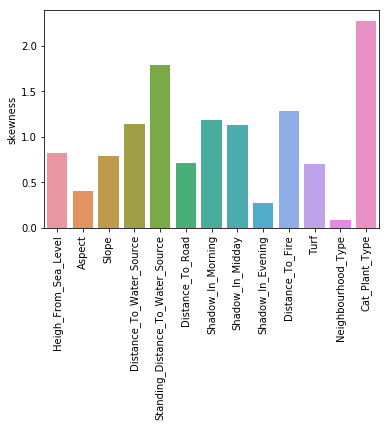

In [0]:
sns.barplot(x=skewDf.index, y='skewness', data = skewDf)
plt.xticks(rotation=90)

##Utility Functions to Remove skewness

In [0]:
def remove_skew_n_power(col):
  print("Removing Skew by applying power of N :")
  power = 0
  min_skew = 99999
  for i in range(1,11):
    skew = abs((col**i).skew())
    print(i,skew)
    if(skew < min_skew) :
      min_skew = skew
      power = i
  return power, min_skew

In [0]:
def remove_skew_n_root(col):
  print("Removing Skew by applying root of N :")
  power = 0
  min_skew = 99999
  for i in range(1,11):
    skew = abs((col**(1/i)).skew())
    print(i,skew)
    if(skew < min_skew) :
      min_skew = skew
      power = 1/i
  return power, min_skew

##Standing_Distance_To_Water_Source

In [0]:
col = cols[4]

In [0]:
print(col)

Standing_Distance_To_Water_Source


In [0]:
plantDf[col].describe()

count    464809.000000
mean         46.390412
std          58.240912
min        -173.000000
25%           7.000000
50%          30.000000
75%          69.000000
max         601.000000
Name: Standing_Distance_To_Water_Source, dtype: float64

In [0]:
plantDf[col].nunique()

686

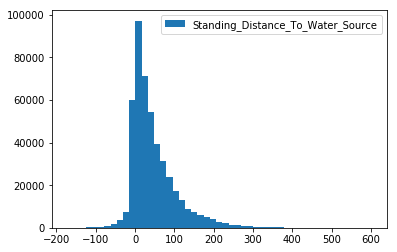

In [0]:
bins = np.linspace(plantDf[col].min(), plantDf[col].max())

plt.hist(plantDf[col], bins, label = col)
plt.legend(loc = 'upper right')
plt.show()

###Removing Skewness

In [0]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(plantDf[col]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(plantDf[col]))

Removing Skew by applying power of N :
1 1.7936129458476855
2 6.863653210631627
3 18.85988073626719
4 37.68340573660747
5 54.668191405859254
6 66.3110633880731
7 11.434876849166542
8 1.5032211807719253
9 0.2539603310203084
10 0.09278754266630126
Minimum Skewness (N, Skewness) : (10, 0.09278754266630126)



Removing Skew by applying root of N :
1 1.7936129458476855
2 0.4669997517813093
3 0.275189730035584
4 0.8437760603896028
5 1.2989296410592794
6 1.6592075265598738
7 1.94196618665301
8 2.1638111453277173
9 2.33880481672419
10 2.478023090165813
Minimum Skewness (N, Skewness) : (0.3333333333333333, 0.275189730035584)


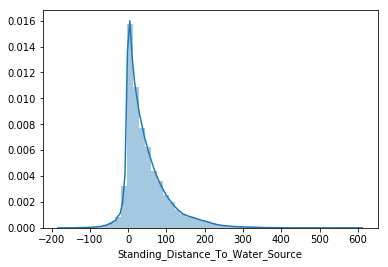

In [0]:
sns.distplot(plantDf[col])

In [0]:
np.cbrt(np.cbrt(plantDf[col])).skew()

-2.0054359185762305

In [0]:
#plantDf[col] = np.log(plantDf[col]+2000)

In [0]:
print(plantDf[col].skew())

1.7936129458476855


Skewness removal on this feature is not producing Good results. Hence, skipped.

###Finding Outliers by using IQR 

Inferences : 
-> Mean   =  37.217765708263244
-> Median =  27.0
-> This feature is Positively skewed
-> Mean - Median =  10.217765708263244
-> IQR =  62.0
-> Data Loss (%) =  5.400497838897268


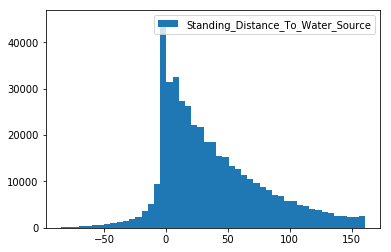

In [0]:
#Inferences are in OUTPUT
q25, q50, q75 = plantDf[col].quantile([.25,.50,.75])

IQR = q75-q25
min_ = q25 - 1.5*IQR
max_ = q75 + 1.5*IQR

plantDfOutliers = plantDf[plantDf[col]<min_]
plantDfOutliers = pd.concat([plantDfOutliers, plantDf[plantDf[col]>max_]])

plantDfWithoutOutliers = plantDf[plantDf[col]>min_]
plantDfWithoutOutliers = plantDfWithoutOutliers[plantDfWithoutOutliers[col]<max_]

mean = plantDfWithoutOutliers[col].mean()
median = plantDfWithoutOutliers[col].median()

print("Inferences : ")
print("-> Mean   = ", mean)
print("-> Median = ", median)
if mean<median :
  print("-> This feature is Negatively skewed")
else:
  print("-> This feature is Positively skewed")
print("-> Mean - Median = ", mean-median)
print("-> IQR = ", IQR)
print("-> Data Loss (%) = ", len(plantDfOutliers[col])*100/len(plantDf[col]))

bins = np.linspace(plantDfWithoutOutliers[col].min(),plantDfWithoutOutliers[col].max())

plt.hist(plantDfWithoutOutliers[col],bins, label = col)
plt.legend(loc='upper right')
plt.show()

During outlier removal in this feature we are having very high data loss (5%). 

Before removing these outlier we should check if a particular class lies in these outliers i.e; these outliers might not actually be outliers, but a particular class which have too high or too low standing distance from water.

In [0]:
plantDfOutliers['Cat_Plant_Type'].value_counts()/plantDf['Cat_Plant_Type'].value_counts()

0    0.049302
1    0.050493
2    0.074593
3    0.050366
4    0.061200
5    0.025196
6    0.136940
Name: Cat_Plant_Type, dtype: float64

None of the classes lies majorly in the outliers. We can remove these outliers. 

In [0]:
plantDf = plantDfWithoutOutliers.copy()

##Distance_To_Fire

In [0]:
col = cols[9]

In [0]:
print(col)

Distance_To_Fire


In [0]:
plantDf[col].describe()

count    439307.000000
mean       1999.260376
std        1341.822421
min           0.000000
25%        1026.000000
50%        1727.000000
75%        2568.000000
max        7173.000000
Name: Distance_To_Fire, dtype: float64

In [0]:
plantDf[col].nunique()

5799

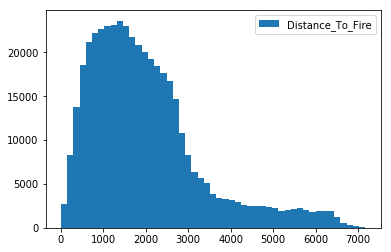

In [0]:
bins = np.linspace(plantDf[col].min(), plantDf[col].max())

plt.hist(plantDf[col], bins, label = col)
plt.legend(loc = 'upper right')
plt.show()

###Removing Skewness

In [0]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(plantDf[col]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(plantDf[col]))

Removing Skew by applying power of N :
1 1.2714770791134145
2 2.601745597743012
3 3.540390453265833
4 4.272687892929354
5 0.8103083424197797
6 0.20890201458689955
7 0.04212782987227815
8 0.021148206903272373
9 0.024282873799823246
10 0.040186355528322164
Minimum Skewness (N, Skewness) : (8, 0.021148206903272373)



Removing Skew by applying root of N :
1 1.2714770791134145
2 0.4074847585391907
3 0.07078522738582359
4 0.11786844754299597
5 0.24597016843881409
6 0.34592598017587345
7 0.43315968918832426
8 0.516319899060411
9 0.6008720789874185
10 0.6905995313785426
Minimum Skewness (N, Skewness) : (0.3333333333333333, 0.07078522738582359)


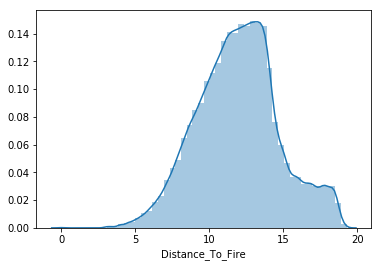

In [0]:
sns.distplot(np.cbrt(plantDf[col]))

In [0]:
plantDf[col] = np.cbrt(plantDf[col])

In [0]:
print(plantDf[col].skew())

0.07078522738582563


###Finding Outliers by using IQR 

Inferences : 
-> Mean   =  12.002662091044446
-> Median =  12.00925212394281
-> This feature is Negatively skewed
-> Mean - Median =  -0.006590032898364129
-> IQR =  3.608116334747592
-> Data Loss (%) =  0.3630718381450785


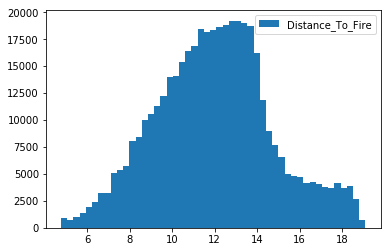

In [0]:
#Inferences are in OUTPUT
q25, q50, q75 = plantDf[col].quantile([.25,.50,.75])

IQR = q75-q25
min_ = q25 - 1.5*IQR
max_ = q75 + 1.5*IQR

plantDfOutliers = plantDf[plantDf[col]<min_]
plantDfOutliers = pd.concat([plantDfOutliers, plantDf[plantDf[col]>max_]])

plantDfWithoutOutliers = plantDf[plantDf[col]>min_]
plantDfWithoutOutliers = plantDfWithoutOutliers[plantDfWithoutOutliers[col]<max_]

mean = plantDfWithoutOutliers[col].mean()
median = plantDfWithoutOutliers[col].median()

print("Inferences : ")
print("-> Mean   = ", mean)
print("-> Median = ", median)
if mean<median :
  print("-> This feature is Negatively skewed")
else:
  print("-> This feature is Positively skewed")
print("-> Mean - Median = ", mean-median)
print("-> IQR = ", IQR)
print("-> Data Loss (%) = ", len(plantDfOutliers[col])*100/len(plantDf[col]))

bins = np.linspace(plantDfWithoutOutliers[col].min(),plantDfWithoutOutliers[col].max())

plt.hist(plantDfWithoutOutliers[col],bins, label = col)
plt.legend(loc='upper right')
plt.show()

In [0]:
plantDf = plantDfWithoutOutliers.copy()

##Shadow_In_Morning

In [0]:
col = cols[6]

In [0]:
print(col)

Shadow_In_Morning


In [0]:
plantDf[col].describe()

count    437712.000000
mean        212.714968
std          26.071121
min           0.000000
25%         199.000000
50%         218.000000
75%         231.000000
max         254.000000
Name: Shadow_In_Morning, dtype: float64

In [0]:
plantDf[col].nunique()

204

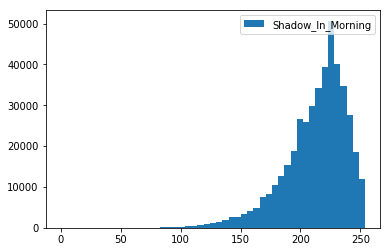

In [0]:
bins = np.linspace(plantDf[col].min(), plantDf[col].max())

plt.hist(plantDf[col], bins, label = col)
plt.legend(loc = 'upper right')
plt.show()

###Removing Skewness

In [0]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(plantDf[col]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(plantDf[col]))

Removing Skew by applying power of N :
1 1.1734681756437386
2 0.7245147606636771
3 0.39494606938823035
4 0.12823027577063983
5 0.09992075559117428
6 0.30263027139859416
7 0.4876652230184301
8 0.8798082790107732
9 0.10439055645136136
10 0.031980716175069104
Minimum Skewness (N, Skewness) : (10, 0.031980716175069104)



Removing Skew by applying root of N :
1 1.1734681756437386
2 1.5416380991600682
3 1.8561223713939108
4 2.297611382447633
5 2.944126842601581
6 3.8452365150592502
7 5.034255626694102
8 6.531527451488399
9 8.345943127754433
10 10.476208828259688
Minimum Skewness (N, Skewness) : (1.0, 1.1734681756437386)


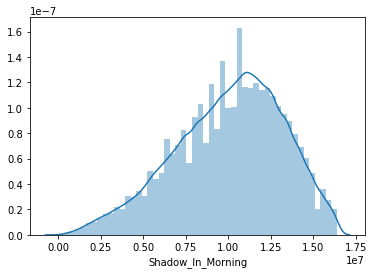

In [0]:
sns.distplot(plantDf[col]**3)

In [0]:
plantDf[col] = plantDf[col]**3

In [0]:
print(plantDf[col].skew())

-0.39494606938823035


###Finding Outliers by using IQR 

Inferences : 
-> Mean   =  10058686.7131418
-> Median =  10360232.0
-> This feature is Negatively skewed
-> Mean - Median =  -301545.28685819916
-> IQR =  4445792.0
-> Data Loss (%) =  0.2264045765252038


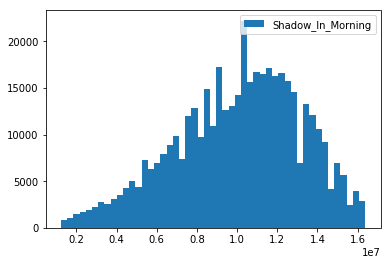

In [0]:
#Inferences are in OUTPUT
q25, q50, q75 = plantDf[col].quantile([.25,.50,.75])

IQR = q75-q25
min_ = q25 - 1.5*IQR
max_ = q75 + 1.5*IQR

plantDfOutliers = plantDf[plantDf[col]<min_]
plantDfOutliers = pd.concat([plantDfOutliers, plantDf[plantDf[col]>max_]])

plantDfWithoutOutliers = plantDf[plantDf[col]>min_]
plantDfWithoutOutliers = plantDfWithoutOutliers[plantDfWithoutOutliers[col]<max_]

mean = plantDfWithoutOutliers[col].mean()
median = plantDfWithoutOutliers[col].median()

print("Inferences : ")
print("-> Mean   = ", mean)
print("-> Median = ", median)
if mean<median :
  print("-> This feature is Negatively skewed")
else:
  print("-> This feature is Positively skewed")
print("-> Mean - Median = ", mean-median)
print("-> IQR = ", IQR)
print("-> Data Loss (%) = ", len(plantDfOutliers[col])*100/len(plantDf[col]))

bins = np.linspace(plantDfWithoutOutliers[col].min(),plantDfWithoutOutliers[col].max())

plt.hist(plantDfWithoutOutliers[col],bins, label = col)
plt.legend(loc='upper right')
plt.show()

In [0]:
plantDf = plantDfWithoutOutliers.copy()

##Distance_To_Water_Source

In [0]:
col = cols[3]

In [0]:
print(col)

Distance_To_Water_Source


In [0]:
plantDf[col].describe()

count    436721.000000
mean        248.310367
std         190.843585
min           0.000000
25%          95.000000
50%         212.000000
75%         360.000000
max        1275.000000
Name: Distance_To_Water_Source, dtype: float64

In [0]:
plantDf[col].nunique()

457

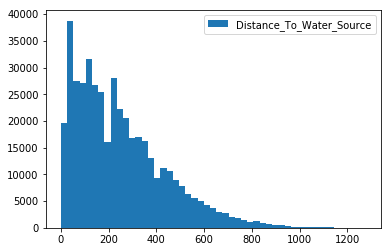

In [0]:
bins = np.linspace(plantDf[col].min(), plantDf[col].max())

plt.hist(plantDf[col], bins, label = col)
plt.legend(loc = 'upper right')
plt.show()

###Removing Skewness

In [0]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(plantDf[col]+1000))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(plantDf[col]+1000))

Removing Skew by applying power of N :
1 1.0359921311219673
2 1.4763632222005378
3 2.020030796729571
4 2.6970240307596076
5 3.538660026504093
6 1.1856190098126669
7 0.26155683477075475
8 0.06658133755308626
9 0.170874256319374
10 0.30311319530844594
Minimum Skewness (N, Skewness) : (8, 0.06658133755308626)



Removing Skew by applying root of N :
1 1.0359921311219673
2 0.8463489258824919
3 0.7869645549113613
4 0.7579384632746196
5 0.7407296747247164
6 0.7293419244729858
7 0.7212488993970697
8 0.715201430428539
9 0.7105109853515732
10 0.7067668734739321
Minimum Skewness (N, Skewness) : (0.1, 0.7067668734739321)


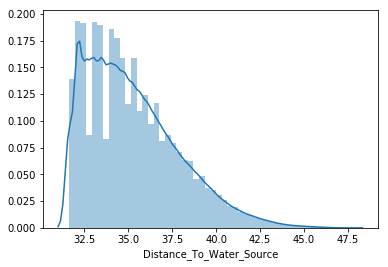

In [0]:
 sns.distplot(np.sqrt(plantDf[col]+1000))

In [0]:
plantDf[col] = np.sqrt(plantDf[col]+1000)

In [0]:
print(plantDf[col].skew())

0.8463489258824919


###Finding Outliers by using IQR 

Inferences : 
-> Mean   =  35.13933470232913
-> Median =  34.785054261852174
-> This feature is Positively skewed
-> Mean - Median =  0.3542804404769555
-> IQR =  3.787393613622953
-> Data Loss (%) =  1.1013896744145575


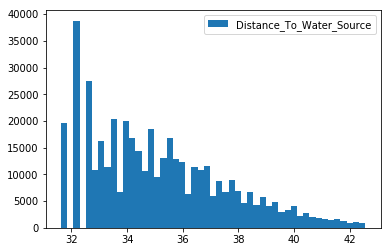

In [0]:
#Inferences are in OUTPUT
q25, q50, q75 = plantDf[col].quantile([.25,.50,.75])

IQR = q75-q25
min_ = q25 - 1.5*IQR
max_ = q75 + 1.5*IQR

plantDfOutliers = plantDf[plantDf[col]<min_]
plantDfOutliers = pd.concat([plantDfOutliers, plantDf[plantDf[col]>max_]])

plantDfWithoutOutliers = plantDf[plantDf[col]>min_]
plantDfWithoutOutliers = plantDfWithoutOutliers[plantDfWithoutOutliers[col]<max_]

mean = plantDfWithoutOutliers[col].mean()
median = plantDfWithoutOutliers[col].median()

print("Inferences : ")
print("-> Mean   = ", mean)
print("-> Median = ", median)
if mean<median :
  print("-> This feature is Negatively skewed")
else:
  print("-> This feature is Positively skewed")
print("-> Mean - Median = ", mean-median)
print("-> IQR = ", IQR)
print("-> Data Loss (%) = ", len(plantDfOutliers[col])*100/len(plantDf[col]))

bins = np.linspace(plantDfWithoutOutliers[col].min(),plantDfWithoutOutliers[col].max())

plt.hist(plantDfWithoutOutliers[col],bins, label = col)
plt.legend(loc='upper right')
plt.show()

In [0]:
plantDf = plantDfWithoutOutliers.copy()

##Shadow_In_Midday

In [0]:
col = cols[7]

In [0]:
print(col)

Shadow_In_Midday


In [0]:
plantDf[col].describe()

count    431911.000000
mean        223.555682
std          19.328363
min           0.000000
25%         214.000000
50%         226.000000
75%         237.000000
max         255.000000
Name: Shadow_In_Midday, dtype: float64

In [0]:
plantDf[col].nunique()

181

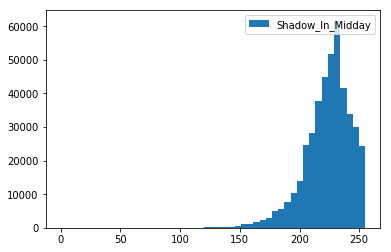

In [0]:
bins = np.linspace(plantDf[col].min(), plantDf[col].max())

plt.hist(plantDf[col], bins, label = col)
plt.legend(loc = 'upper right')
plt.show()

###Removing Skewness

In [0]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(plantDf[col]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(plantDf[col]))

Removing Skew by applying power of N :
1 1.127549453480982
2 0.7362217132253236
3 0.44092386485187407
4 0.19940479821779755
5 0.0067847485332179595
6 0.18790185443790033
7 0.350279765443696
8 0.49810295500820767
9 0.634275961099074
10 0.7608939268814968
Minimum Skewness (N, Skewness) : (5, 0.0067847485332179595)



Removing Skew by applying root of N :
1 1.127549453480982
2 1.4236619545877183
3 1.6343542348582947
4 1.9009189075347674
5 2.2808979440579025
6 2.813219903946392
7 3.529088076941149
8 4.454760416590416
9 5.612390734126837
10 7.020300139470066
Minimum Skewness (N, Skewness) : (1.0, 1.127549453480982)


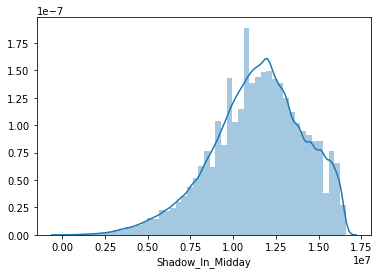

In [0]:
sns.distplot(plantDf[col]**3)

In [0]:
plantDf[col] = plantDf[col]**3

In [0]:
print(plantDf[col].skew())

-0.44092386485187407


###Finding Outliers by using IQR 

Inferences : 
-> Mean   =  11514300.543088837
-> Median =  11543176.0
-> This feature is Negatively skewed
-> Mean - Median =  -28875.456911163405
-> IQR =  3511709.0
-> Data Loss (%) =  1.2414594673439667


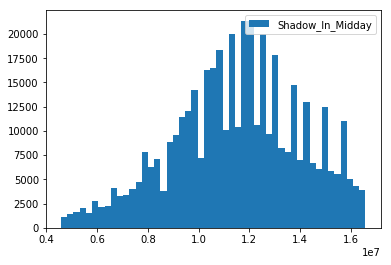

In [0]:
#Inferences are in OUTPUT
q25, q50, q75 = plantDf[col].quantile([.25,.50,.75])

IQR = q75-q25
min_ = q25 - 1.5*IQR
max_ = q75 + 1.5*IQR

plantDfOutliers = plantDf[plantDf[col]<min_]
plantDfOutliers = pd.concat([plantDfOutliers, plantDf[plantDf[col]>max_]])

plantDfWithoutOutliers = plantDf[plantDf[col]>min_]
plantDfWithoutOutliers = plantDfWithoutOutliers[plantDfWithoutOutliers[col]<max_]

mean = plantDfWithoutOutliers[col].mean()
median = plantDfWithoutOutliers[col].median()

print("Inferences : ")
print("-> Mean   = ", mean)
print("-> Median = ", median)
if mean<median :
  print("-> This feature is Negatively skewed")
else:
  print("-> This feature is Positively skewed")
print("-> Mean - Median = ", mean-median)
print("-> IQR = ", IQR)
print("-> Data Loss (%) = ", len(plantDfOutliers[col])*100/len(plantDf[col]))

bins = np.linspace(plantDfWithoutOutliers[col].min(),plantDfWithoutOutliers[col].max())

plt.hist(plantDfWithoutOutliers[col],bins, label = col)
plt.legend(loc='upper right')
plt.show()

In [0]:
plantDf = plantDfWithoutOutliers.copy()

##Testing Random Forest

In [0]:
plantDfCopy = plantDf.copy()

###Scaling the Data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
plantDf.columns

Index(['Heigh_From_Sea_Level', 'Aspect', 'Slope', 'Distance_To_Water_Source',
       'Standing_Distance_To_Water_Source', 'Distance_To_Road',
       'Shadow_In_Morning', 'Shadow_In_Midday', 'Shadow_In_Evening',
       'Distance_To_Fire', 'Turf', 'Neighbourhood_Type', 'Cat_Plant_Type'],
      dtype='object')

In [0]:
colNum = plantDf.columns[0:10]

In [0]:
colNum

Index(['Heigh_From_Sea_Level', 'Aspect', 'Slope', 'Distance_To_Water_Source',
       'Standing_Distance_To_Water_Source', 'Distance_To_Road',
       'Shadow_In_Morning', 'Shadow_In_Midday', 'Shadow_In_Evening',
       'Distance_To_Fire'],
      dtype='object')

In [0]:
plantDf[colNum]= scaler.fit_transform(plantDf[colNum])

In [0]:
plantDf.sample(5)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Cat_Plant_Type
90445,0.518668,0.869444,0.262295,0.043065,0.390244,0.441338,0.266652,0.580398,0.779592,0.627318,23,1,1
287179,0.465187,0.230556,0.098361,0.369734,0.447154,0.267669,0.700916,0.632352,0.559184,0.538292,12,1,1
459297,0.437941,0.080556,0.344262,0.127354,0.540650,0.168470,0.512720,0.190280,0.453061,0.543923,33,3,1
50255,0.702321,0.150000,0.229508,0.383809,0.491870,0.258817,0.700916,0.379362,0.453061,0.604563,39,1,0
303728,0.529768,0.116667,0.114754,0.085508,0.300813,0.304342,0.640812,0.555100,0.559184,0.667587,26,3,0


###Feature Elimination

In [0]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

def rfe(X,Y,n):
  model = RandomForestClassifier()
  rfe = RFE(model, n)
  fit = rfe.fit(X, Y)
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))
  return list(fit.ranking_)

In [0]:
plantDf.columns

Index(['Heigh_From_Sea_Level', 'Aspect', 'Slope', 'Distance_To_Water_Source',
       'Standing_Distance_To_Water_Source', 'Distance_To_Road',
       'Shadow_In_Morning', 'Shadow_In_Midday', 'Shadow_In_Evening',
       'Distance_To_Fire', 'Turf', 'Neighbourhood_Type', 'Cat_Plant_Type'],
      dtype='object')

In [0]:
yCol = 'Cat_Plant_Type'

In [0]:
xCol = plantDf.columns[:-3]

In [0]:
ranks = rfe(plantDf[xCol], plantDf[yCol],5)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Num Features: 5
Selected Features: [ True  True False  True False  True False False False  True]
Feature Ranking: [1 1 6 1 2 1 4 3 5 1]


In [0]:
xCol

Index(['Heigh_From_Sea_Level', 'Aspect', 'Slope', 'Distance_To_Water_Source',
       'Standing_Distance_To_Water_Source', 'Distance_To_Road',
       'Shadow_In_Morning', 'Shadow_In_Midday', 'Shadow_In_Evening',
       'Distance_To_Fire'],
      dtype='object')

In [0]:
dropCols = []
for i in range(len(ranks)):
  if ranks[i]>2:
    dropCols.append(xCol[i])

In [0]:
plantDf.drop(dropCols, axis = 1, inplace = True)

###One Hot Encoding

In [0]:
plantDf = pd.get_dummies(plantDf, prefix_sep = '__',
                         columns = ['Turf', 'Neighbourhood_Type'])

###Training

In [0]:
from sklearn.model_selection import train_test_split

y = plantDf.Cat_Plant_Type
x = plantDf.drop('Cat_Plant_Type', axis = 1)

#Setting up testing and training sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .2, random_state = 11)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier()

random_forest.fit(xTrain, yTrain)

yTrainPred = random_forest.predict(xTrain)
yTestPred = random_forest.predict(xTest)
print('The accuracy of the Random Forest classifier on training data is {:.2f}'.format(accuracy_score(yTrain, yTrainPred)))
print('The accuracy of the Random Forest classifier on test data is {:.2f}'.format(accuracy_score(yTest,yTestPred)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest classifier on training data is 1.00
The accuracy of the Random Forest classifier on test data is 0.95


In [0]:
from sklearn.metrics import classification_report 
print(classification_report(yTest,yTestPred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     31505
           1       0.96      0.96      0.96     42101
           2       0.92      0.95      0.94      4858
           3       0.89      0.80      0.84       379
           4       0.91      0.76      0.82      1365
           5       0.93      0.87      0.90      2486
           6       0.97      0.93      0.95      2616

    accuracy                           0.95     85310
   macro avg       0.93      0.89      0.91     85310
weighted avg       0.95      0.95      0.95     85310



In [0]:
plantDf = plantDfCopy.copy()

##Heigh_From_Sea_Level

In [0]:
col = cols[0]

In [0]:
print(col)

Heigh_From_Sea_Level


In [0]:
plantDf[col].describe()

count    426549.000000
mean       2956.500801
std         269.676992
min        1859.000000
25%        2806.000000
50%        2991.000000
75%        3157.000000
max        3841.000000
Name: Heigh_From_Sea_Level, dtype: float64

In [0]:
plantDf[col].nunique()

1767

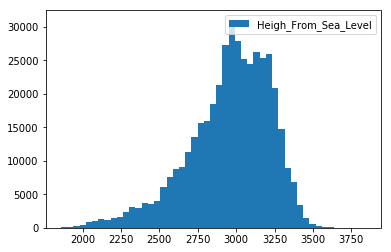

In [0]:
bins = np.linspace(plantDf[col].min(), plantDf[col].max())

plt.hist(plantDf[col], bins, label = col)
plt.legend(loc = 'upper right')
plt.show()

###Removing Skewness

In [0]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(plantDf[col]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(plantDf[col]))

Removing Skew by applying power of N :
1 0.8249328539952546
2 0.5471476571832862
3 0.29899059564025027
4 0.07324939735614182
5 0.13604588532284698
6 0.0002169424049607495
7 0.025542668987114388
8 0.05457970787537611
9 0.055299037099359086
10 0.060280438052696034
Minimum Skewness (N, Skewness) : (6, 0.0002169424049607495)



Removing Skew by applying root of N :
1 0.8249328539952546
2 0.9775567748955255
3 1.0307514194952883
4 1.0578091899535111
5 1.074194520984889
6 1.0851816293679442
7 1.0930609378613554
8 1.098987670990927
9 1.1036076169773374
10 1.1073100606514095
Minimum Skewness (N, Skewness) : (1.0, 0.8249328539952546)


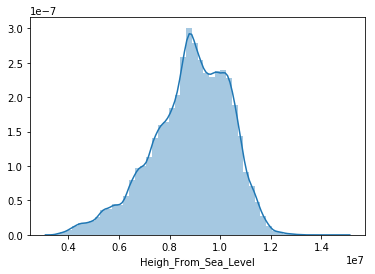

In [0]:
sns.distplot(plantDf[col]**2)

In [0]:
plantDf[col] = plantDf[col]**2

In [0]:
print(plantDf[col].skew())

-0.5471476571832862


###Finding Outliers by using IQR 

Inferences : 
-> Mean   =  8868535.805219587
-> Median =  8970025.0
-> This feature is Negatively skewed
-> Mean - Median =  -101489.19478041306
-> IQR =  2093013.0
-> Data Loss (%) =  1.2221339166191927


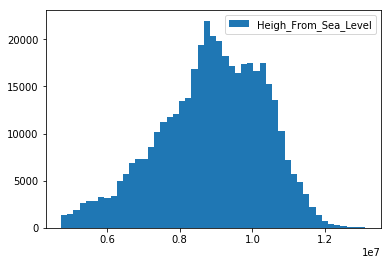

In [0]:
#Inferences are in OUTPUT
q25, q50, q75 = plantDf[col].quantile([.25,.50,.75])

IQR = q75-q25
min_ = q25 - 1.5*IQR
max_ = q75 + 1.5*IQR

plantDfOutliers = plantDf[plantDf[col]<min_]
plantDfOutliers = pd.concat([plantDfOutliers, plantDf[plantDf[col]>max_]])

plantDfWithoutOutliers = plantDf[plantDf[col]>min_]
plantDfWithoutOutliers = plantDfWithoutOutliers[plantDfWithoutOutliers[col]<max_]

mean = plantDfWithoutOutliers[col].mean()
median = plantDfWithoutOutliers[col].median()

print("Inferences : ")
print("-> Mean   = ", mean)
print("-> Median = ", median)
if mean<median :
  print("-> This feature is Negatively skewed")
else:
  print("-> This feature is Positively skewed")
print("-> Mean - Median = ", mean-median)
print("-> IQR = ", IQR)
print("-> Data Loss (%) = ", len(plantDfOutliers[col])*100/len(plantDf[col]))

bins = np.linspace(plantDfWithoutOutliers[col].min(),plantDfWithoutOutliers[col].max())

plt.hist(plantDfWithoutOutliers[col],bins, label = col)
plt.legend(loc='upper right')
plt.show()

In [0]:
plantDf = plantDfWithoutOutliers.copy()

##Slope

In [0]:
col = cols[2]

In [0]:
print(col)

Slope


In [0]:
plantDf[col].describe()

count    421336.000000
mean         13.422876
std           6.869352
min           0.000000
25%           8.000000
50%          13.000000
75%          18.000000
max          61.000000
Name: Slope, dtype: float64

In [0]:
plantDf[col].nunique()

57

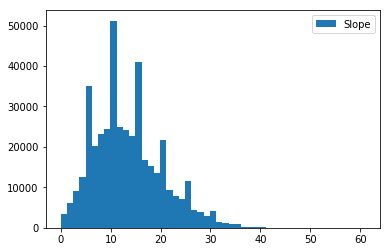

In [0]:
bins = np.linspace(plantDf[col].min(), plantDf[col].max())

plt.hist(plantDf[col], bins, label = col)
plt.legend(loc = 'upper right')
plt.show()

###Removing Skewness

In [0]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(plantDf[col]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(plantDf[col]))

Removing Skew by applying power of N :
1 0.6430626321145558
2 1.869858551057082
3 3.4796424949163005
4 7.19177617212276
5 19.22329116166636
6 52.32591898967083
7 108.94299137430406
8 166.97520169419622
9 209.6949953014175
10 238.3866676939821
Minimum Skewness (N, Skewness) : (1, 0.6430626321145558)



Removing Skew by applying root of N :
1 0.6430626321145558
2 0.0755552817885303
3 0.4404384799924966
4 0.7653271463515475
5 1.132778376537089
6 1.5750970169797789
7 2.103861912962716
8 2.719087240841229
9 3.413619089398695
10 4.175972203476125
Minimum Skewness (N, Skewness) : (0.5, 0.0755552817885303)


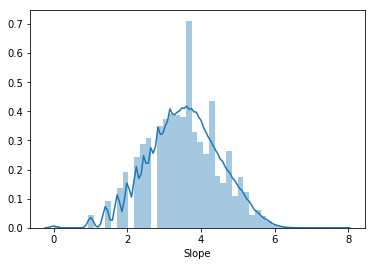

In [0]:
sns.distplot(np.sqrt(plantDf[col]))

In [0]:
plantDf[col] = np.sqrt(plantDf[col])

In [0]:
print(plantDf[col].skew())

-0.0755552817885303


###Finding Outliers by using IQR 

Inferences : 
-> Mean   =  3.537847551346671
-> Median =  3.605551275463989
-> This feature is Negatively skewed
-> Mean - Median =  -0.06770372411731795
-> IQR =  1.4142135623730945
-> Data Loss (%) =  0.14050543983898836


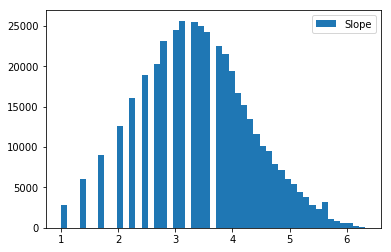

In [0]:
#Inferences are in OUTPUT
q25, q50, q75 = plantDf[col].quantile([.25,.50,.75])

IQR = q75-q25
min_ = q25 - 1.5*IQR
max_ = q75 + 1.5*IQR

plantDfOutliers = plantDf[plantDf[col]<min_]
plantDfOutliers = pd.concat([plantDfOutliers, plantDf[plantDf[col]>max_]])

plantDfWithoutOutliers = plantDf[plantDf[col]>min_]
plantDfWithoutOutliers = plantDfWithoutOutliers[plantDfWithoutOutliers[col]<max_]

mean = plantDfWithoutOutliers[col].mean()
median = plantDfWithoutOutliers[col].median()

print("Inferences : ")
print("-> Mean   = ", mean)
print("-> Median = ", median)
if mean<median :
  print("-> This feature is Negatively skewed")
else:
  print("-> This feature is Positively skewed")
print("-> Mean - Median = ", mean-median)
print("-> IQR = ", IQR)
print("-> Data Loss (%) = ", len(plantDfOutliers[col])*100/len(plantDf[col]))

bins = np.linspace(plantDfWithoutOutliers[col].min(),plantDfWithoutOutliers[col].max())

plt.hist(plantDfWithoutOutliers[col],bins, label = col)
plt.legend(loc='upper right')
plt.show()

In [0]:
plantDf = plantDfWithoutOutliers.copy()

##Distance_To_Road

In [0]:
col = cols[5]

In [0]:
print(col)

Distance_To_Road


In [0]:
plantDf[col].describe()

count    420744.000000
mean       2403.548547
std        1561.718464
min           0.000000
25%        1154.000000
50%        2053.000000
75%        3408.000000
max        7117.000000
Name: Distance_To_Road, dtype: float64

In [0]:
plantDf[col].nunique()

5744

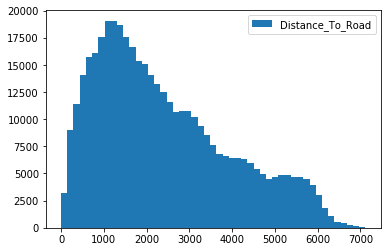

In [0]:
bins = np.linspace(plantDf[col].min(), plantDf[col].max())

plt.hist(plantDf[col], bins, label = col)
plt.legend(loc = 'upper right')
plt.show()

###Removing Skewness

In [0]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(plantDf[col]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(plantDf[col]))

Removing Skew by applying power of N :
1 0.6786822472275528
2 1.5201077616722694
3 2.172780360264639
4 2.762387742905793
5 1.6212835280405986
6 0.18376282327721566
7 0.02154989990287643
8 0.03222219893257842
9 0.01938527737625843
10 0.027407754839743573
Minimum Skewness (N, Skewness) : (9, 0.01938527737625843)



Removing Skew by applying root of N :
1 0.6786822472275528
2 0.07299291836662038
3 0.19681822124460172
4 0.3619473300807412
5 0.4848989000976468
6 0.5914797034074311
7 0.6950637668826364
8 0.803716667045639
9 0.9228491355236023
10 1.056366390826463
Minimum Skewness (N, Skewness) : (0.5, 0.07299291836662038)


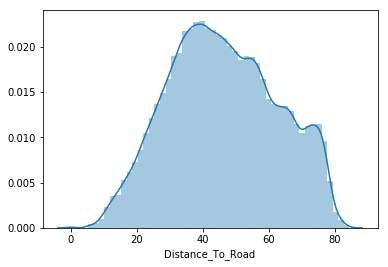

In [0]:
sns.distplot(np.sqrt(plantDf[col]))

In [0]:
np.sqrt(plantDf[col]).skew()

0.07299291836662038

In [0]:
plantDf[col] = np.sqrt(plantDf[col])

In [0]:
print(plantDf[col].skew())

0.07299291836662038


###Finding Outliers by using IQR 

Inferences : 
-> Mean   =  46.210823946735594
-> Median =  45.31004303683677
-> This feature is Positively skewed
-> Mean - Median =  0.9007809098988275
-> IQR =  24.407502574379635
-> Data Loss (%) =  0.0


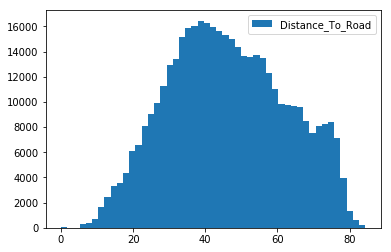

In [0]:
#Inferences are in OUTPUT
q25, q50, q75 = plantDf[col].quantile([.25,.50,.75])

IQR = q75-q25
min_ = q25 - 1.5*IQR
max_ = q75 + 1.5*IQR

plantDfOutliers = plantDf[plantDf[col]<min_]
plantDfOutliers = pd.concat([plantDfOutliers, plantDf[plantDf[col]>max_]])

plantDfWithoutOutliers = plantDf[plantDf[col]>min_]
plantDfWithoutOutliers = plantDfWithoutOutliers[plantDfWithoutOutliers[col]<max_]

mean = plantDfWithoutOutliers[col].mean()
median = plantDfWithoutOutliers[col].median()

print("Inferences : ")
print("-> Mean   = ", mean)
print("-> Median = ", median)
if mean<median :
  print("-> This feature is Negatively skewed")
else:
  print("-> This feature is Positively skewed")
print("-> Mean - Median = ", mean-median)
print("-> IQR = ", IQR)
print("-> Data Loss (%) = ", len(plantDfOutliers[col])*100/len(plantDf[col]))

bins = np.linspace(plantDfWithoutOutliers[col].min(),plantDfWithoutOutliers[col].max())

plt.hist(plantDfWithoutOutliers[col],bins, label = col)
plt.legend(loc='upper right')
plt.show()

##Shadow_In_Evening

In [0]:
col = cols[8]

In [0]:
print(col)

Shadow_In_Evening


In [0]:
plantDf[col].describe()

count    420744.000000
mean        142.952815
std          35.885975
min           0.000000
25%         120.000000
50%         143.000000
75%         167.000000
max         245.000000
Name: Shadow_In_Evening, dtype: float64

In [0]:
plantDf[col].nunique()

244

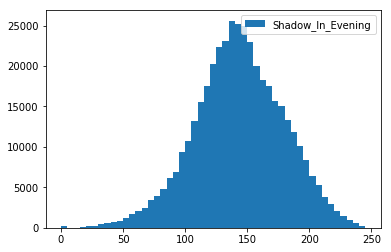

In [0]:
bins = np.linspace(plantDf[col].min(), plantDf[col].max())

plt.hist(plantDf[col], bins, label = col)
plt.legend(loc = 'upper right')
plt.show()

###Removing Skewness

In [0]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(plantDf[col]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(plantDf[col]))

Removing Skew by applying power of N :
1 0.17035460911167855
2 0.5703863648254927
3 1.1511779478633806
4 1.6930734580238498
5 2.2365334911898596
6 2.7993201717320972
7 3.3886893379464866
8 2.051875778214819
9 0.2780399266206114
10 0.2640594965762088
Minimum Skewness (N, Skewness) : (1, 0.17035460911167855)



Removing Skew by applying root of N :
1 0.17035460911167855
2 0.8519167083353855
3 1.506236300475727
4 2.388707990776407
5 3.5564997255589663
6 4.992063617753862
7 6.640734915522469
8 8.433470360414885
9 10.301720370212426
10 12.185900752024628
Minimum Skewness (N, Skewness) : (1.0, 0.17035460911167855)


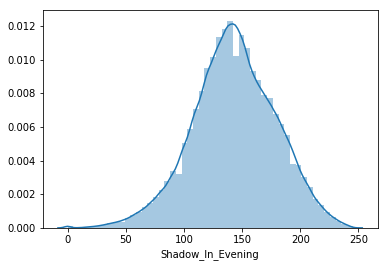

In [0]:
sns.distplot(plantDfWithoutOutliers[col])

In [0]:
print(plantDfWithoutOutliers[col].skew())

-0.17035460911167855


###Finding Outliers by using IQR 

Inferences : 
-> Mean   =  143.74217074422913
-> Median =  143.0
-> This feature is Positively skewed
-> Mean - Median =  0.7421707442291279
-> IQR =  47.0
-> Data Loss (%) =  0.9293061814309889


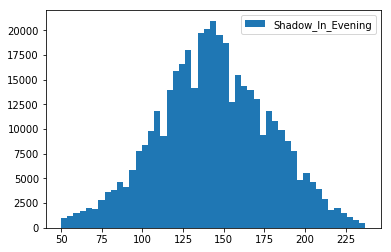

In [0]:
#Inferences are in OUTPUT
q25, q50, q75 = plantDf[col].quantile([.25,.50,.75])

IQR = q75-q25
min_ = q25 - 1.5*IQR
max_ = q75 + 1.5*IQR

plantDfOutliers = plantDf[plantDf[col]<min_]
plantDfOutliers = pd.concat([plantDfOutliers, plantDf[plantDf[col]>max_]])

plantDfWithoutOutliers = plantDf[plantDf[col]>min_]
plantDfWithoutOutliers = plantDfWithoutOutliers[plantDfWithoutOutliers[col]<max_]

mean = plantDfWithoutOutliers[col].mean()
median = plantDfWithoutOutliers[col].median()

print("Inferences : ")
print("-> Mean   = ", mean)
print("-> Median = ", median)
if mean<median :
  print("-> This feature is Negatively skewed")
else:
  print("-> This feature is Positively skewed")
print("-> Mean - Median = ", mean-median)
print("-> IQR = ", IQR)
print("-> Data Loss (%) = ", len(plantDfOutliers[col])*100/len(plantDf[col]))

bins = np.linspace(plantDfWithoutOutliers[col].min(),plantDfWithoutOutliers[col].max())

plt.hist(plantDfWithoutOutliers[col],bins, label = col)
plt.legend(loc='upper right')
plt.show()

In [0]:
plantDf = plantDfWithoutOutliers.copy()

##Aspect

In [0]:
col = cols[1]

In [0]:
print(col)

Aspect


In [0]:
plantDf[col].describe()

count    416834.000000
mean        155.111406
std         111.596944
min           0.000000
25%          58.000000
50%         127.000000
75%         258.000000
max         360.000000
Name: Aspect, dtype: float64

In [0]:
plantDf[col].nunique()

361

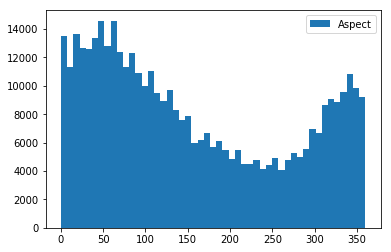

In [0]:
bins = np.linspace(plantDf[col].min(), plantDf[col].max())

plt.hist(plantDf[col], bins, label = col)
plt.legend(loc = 'upper right')
plt.show()

###Removing Skewness

In [0]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(plantDf[col]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(plantDf[col]))

Removing Skew by applying power of N :
1 0.41656803423374406
2 0.9415523275292923
3 1.2501519415240114
4 1.4824659453514104
5 1.6790132955423267
6 1.8553363198955433
7 2.018451210353533
8 0.08721456788965942
9 0.056352089724678776
10 0.03758232581531336
Minimum Skewness (N, Skewness) : (10, 0.03758232581531336)



Removing Skew by applying root of N :
1 0.41656803423374406
2 0.12931173281830077
3 0.4999415641748736
4 0.8513748453983075
5 1.2319695946006084
6 1.6532524793320904
7 2.1103878345537894
8 2.5917005313454307
9 3.083870031190409
10 3.574680201908191
Minimum Skewness (N, Skewness) : (0.5, 0.12931173281830077)


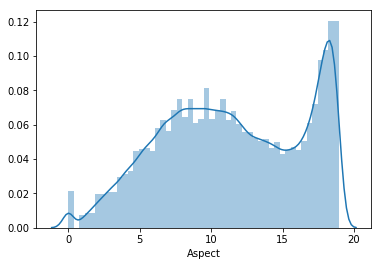

In [0]:
sns.distplot(np.sqrt(plantDf[col]))

In [0]:
plantDf[col] = np.sqrt(plantDf[col])

In [0]:
print(plantDf[col].skew())

-0.12931173281830077


###Finding Outliers by using IQR 

Inferences : 
-> Mean   =  11.450730611220228
-> Median =  11.269427669584644
-> This feature is Positively skewed
-> Mean - Median =  0.18130294163558425
-> IQR =  8.446605298345101
-> Data Loss (%) =  0.0


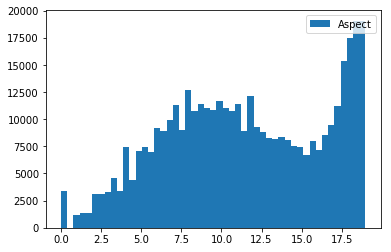

In [0]:
#Inferences are in OUTPUT
q25, q50, q75 = plantDf[col].quantile([.25,.50,.75])

IQR = q75-q25
min_ = q25 - 1.5*IQR
max_ = q75 + 1.5*IQR

plantDfOutliers = plantDf[plantDf[col]<min_]
plantDfOutliers = pd.concat([plantDfOutliers, plantDf[plantDf[col]>max_]])

plantDfWithoutOutliers = plantDf[plantDf[col]>min_]
plantDfWithoutOutliers = plantDfWithoutOutliers[plantDfWithoutOutliers[col]<max_]

mean = plantDfWithoutOutliers[col].mean()
median = plantDfWithoutOutliers[col].median()

print("Inferences : ")
print("-> Mean   = ", mean)
print("-> Median = ", median)
if mean<median :
  print("-> This feature is Negatively skewed")
else:
  print("-> This feature is Positively skewed")
print("-> Mean - Median = ", mean-median)
print("-> IQR = ", IQR)
print("-> Data Loss (%) = ", len(plantDfOutliers[col])*100/len(plantDf[col]))

bins = np.linspace(plantDfWithoutOutliers[col].min(),plantDfWithoutOutliers[col].max())

plt.hist(plantDfWithoutOutliers[col],bins, label = col)
plt.legend(loc='upper right')
plt.show()

In [0]:
plantDf = plantDfWithoutOutliers.copy()

#Data Loss and Skewness after outlier removal

In [0]:
print("Total Data Loss (%) : ", 100 - len(plantDf)*100/len(plantDfOriginal))

Total Data Loss (%) :  10.32144386188736


In [0]:
print("Plant Type Class wise Data Loss (%) : \n", 100 - plantDf['Cat_Plant_Type']
      .value_counts()*100/plantDfOriginal['Cat_Plant_Type'].value_counts())

Plant Type Class wise Data Loss (%) : 
 1     8.026290
0     7.811219
2    29.226341
6    21.399854
5    18.498313
4    15.201369
3    44.368132
Name: Cat_Plant_Type, dtype: float64


In [0]:
print("Plant Type Counts : \n", plantDf['Cat_Plant_Type'].value_counts())

Plant Type Counts : 
 1    208509
0    156248
2     20162
6     12903
5     11354
4      6443
3      1215
Name: Cat_Plant_Type, dtype: int64


In [0]:
plantDf.skew()

Heigh_From_Sea_Level                -0.401186
Aspect                              -0.129312
Slope                               -0.075326
Distance_To_Water_Source             0.645882
Standing_Distance_To_Water_Source    0.856166
Distance_To_Road                     0.069896
Shadow_In_Morning                   -0.371699
Shadow_In_Midday                    -0.212830
Shadow_In_Evening                   -0.019613
Distance_To_Fire                     0.117382
Turf                                -0.735947
Neighbourhood_Type                   0.155918
Cat_Plant_Type                       2.427949
dtype: float64

#Scaling the Data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
plantDf.columns

Index(['Heigh_From_Sea_Level', 'Aspect', 'Slope', 'Distance_To_Water_Source',
       'Standing_Distance_To_Water_Source', 'Distance_To_Road',
       'Shadow_In_Morning', 'Shadow_In_Midday', 'Shadow_In_Evening',
       'Distance_To_Fire', 'Turf', 'Neighbourhood_Type', 'Cat_Plant_Type'],
      dtype='object')

In [0]:
colNum = plantDf.columns[0:10]

In [0]:
colNum

Index(['Heigh_From_Sea_Level', 'Aspect', 'Slope', 'Distance_To_Water_Source',
       'Standing_Distance_To_Water_Source', 'Distance_To_Road',
       'Shadow_In_Morning', 'Shadow_In_Midday', 'Shadow_In_Evening',
       'Distance_To_Fire'],
      dtype='object')

In [0]:
plantDf[colNum]= scaler.fit_transform(plantDf[colNum])

In [0]:
plantDf.sample(5)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Cat_Plant_Type
242886,0.562566,0.283823,0.462781,0.043065,0.349593,0.628019,0.583870,0.423858,0.433155,0.560823,23,3,0
383630,0.240092,0.223607,0.343395,0.262836,0.353659,0.384102,0.565578,0.542619,0.508021,0.529705,20,1,1
217196,0.721262,0.494413,0.652099,0.585703,0.581301,0.412840,0.889135,0.326088,0.155080,0.575874,40,1,0
117350,0.771146,0.958877,0.462781,0.043065,0.369919,0.451529,0.378764,0.580398,0.657754,0.496985,38,2,0
286797,0.697064,0.229734,0.489346,0.351733,0.593496,0.367271,0.530006,0.412576,0.465241,0.526192,23,2,0


#Testing Random Forest

In [0]:
from sklearn.model_selection import train_test_split

y = plantDf.Cat_Plant_Type
x = plantDf.drop('Cat_Plant_Type', axis = 1)

#Setting up testing and training sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .2, random_state = 11)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(n_estimators = 100)

random_forest.fit(xTrain, yTrain)

yTrainPred = random_forest.predict(xTrain)
yTestPred = random_forest.predict(xTest)
print('The accuracy of the Random Forest classifier on training data is {:.2f}'.format(accuracy_score(yTrain, yTrainPred)))
print('The accuracy of the Random Forest classifier on test data is {:.2f}'.format(accuracy_score(yTest,yTestPred)))

The accuracy of the Random Forest classifier on training data is 1.00
The accuracy of the Random Forest classifier on test data is 0.96


In [0]:
from sklearn.metrics import classification_report 
print(classification_report(yTest,yTestPred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     31159
           1       0.95      0.97      0.96     41693
           2       0.94      0.96      0.95      4061
           3       0.93      0.81      0.86       256
           4       0.94      0.76      0.84      1333
           5       0.93      0.91      0.92      2238
           6       0.98      0.95      0.96      2627

    accuracy                           0.96     83367
   macro avg       0.95      0.90      0.92     83367
weighted avg       0.96      0.96      0.96     83367



#Saving Scaled and Normalised Dataframe

In [0]:
plantDf.to_csv(PATH+'Data/capstone_train_scaled_norm.csv')